# Sample vs population


As researchers, we aim to find answers that are true *in general* or *for everybody*. 

For example, *Do taller people earn more? Do people taking a certain drug have fewer panic attacks? Do neurons fire faster in the presence of a certain neuromodulator?*

To answer these questions, we cannot measure the heights and earnings of all workers, monitor all patients or record all neurons in the brain. Instead we measure a *sample* of workers/ pateints/ neurons and try to generalize or *infer* something about the population from this sample.

To understand this process it is important to understand the relationship between sample and population. Using the computer, we can explore this relationship by taking a large 'parent' dataset (similar to the population) and repeatedly drawing samples from it.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Load and plot the data

We will work with a distinctly non-normal data distribution - scores on a fictional 100-item political questionairre called BrexDex, from UK residents who were adults at the time of Brexit in 2016.

The questions are designed and scored so that a high score overall score on the questionairre indicates an attitude agains Brexit, and a low score indicates an attitude in favour of Brexit.

Because the scores relate to a polarizing topic, the data distribution is bimodal.

A datafile is provided containing 10,000 individuals scores on BrexDex. This dataset is the *parent* dataset - we are going to simulate sampling from the whole population (roughly, all UK adults) by sampling from these 10,000 datapoints.


First load the data:

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/UKBrexdex.csv')
UKBrexdex

,ID_code,score
0,186640,53
1,588140,90
2,977390,30
3,948470,42
4,564360,84
...,...,...
9995,851780,81
9996,698340,45
9997,693580,51
9998,872730,78


We can see that the dataset contains 10,000 individuals' scores on the BrexDex questionnaire. 

Let's plot them to get a sense of the distribution:

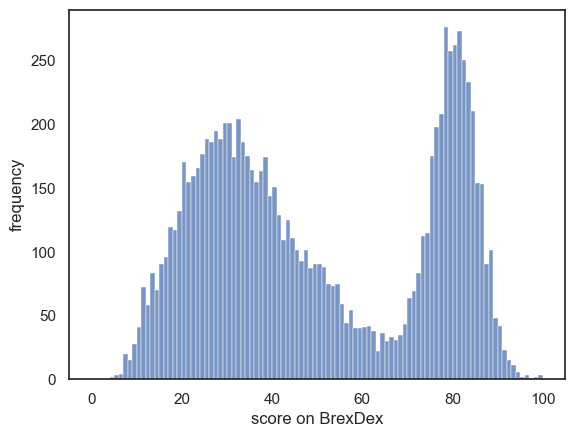

In [3]:
sns.histplot(UKBrexdex.score, bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

The dataset (10,000 responses) is large enough that we can assume the distribution is quite representative of the populationa as a whole. 

What kind of distribution of responses would we expect to get in a sample of 100?

### The sample distribution resembles the parent distribution

Let's see what happens if we draw a random sample of 100 from our national dataset.

We can do this using the tool `df.sample()` which makes a random selection of datapoints from a larger dataset:

In [4]:
sample = UKBrexdex.sample(n=100, replace=False)
sample

,ID_code,score
2050,847510,11
7469,736900,25
3934,257150,35
696,819280,26
6652,894090,32
...,...,...
9615,884480,74
4349,219300,31
2035,227020,59
5165,825570,32


Note that this new dataframe, `sample`, has 100 rows rather than 10,000.

Let's plot the data and compare to our national sample:

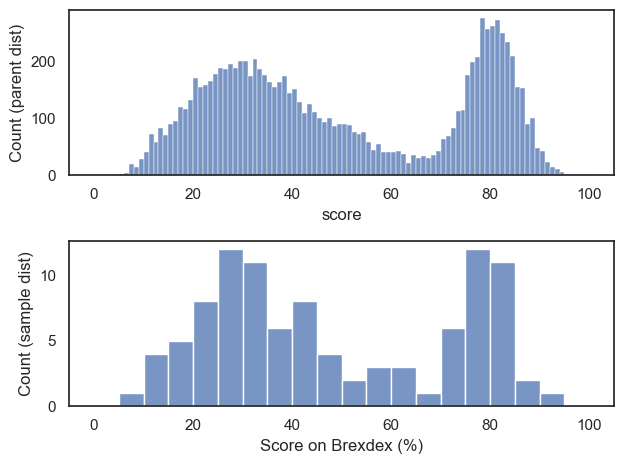

In [5]:
plt.subplot(2,1,1)
sns.histplot(UKBrexdex.score, bins=range(101))
plt.ylabel('Count (parent dist)')

plt.subplot(2,1,2)
sns.histplot(sample.score, bins=range(0,101,5)) # use wider bins for the sample as there are fewer datapoints
plt.ylabel('Count (sample dist)')
plt.xlabel('Score on Brexdex (%)')

plt.tight_layout()
plt.show()

Hopefully we can see that the distribution within the sample resembles the shape of the distribution in the national sample, with two peaks, although somewhat noisier

Let's draw a few more random samples, each time of size 100, to check that this relationship is reliable:

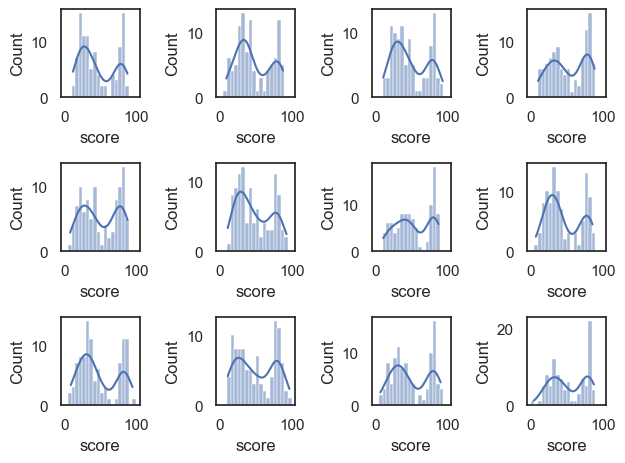

In [6]:
plt.figure()

for i in range(1,13):
    sample = UKBrexdex.sample(n=100, replace=False)
    plt.subplot(3,4,i)
    sns.histplot(sample.score, bins=range(0,101,5), kde=True) # use wider bins for the sample as there are fewer datapoints   A
plt.tight_layout()    
plt.show()

Notice that we always manage to reproduce the bimodal shape, albeit with random variability. 

**The distribution within each sample resembles the parent distribution from which it is drawn, ie the UK national sample.**

This is true even if the sample size gets small. Let's try the same thing for samples of size $n=20$

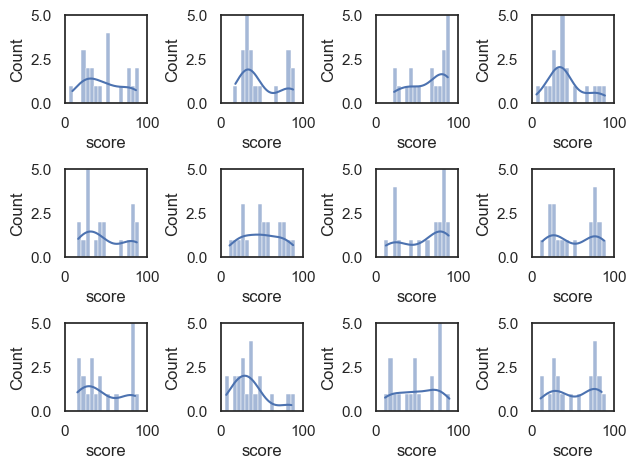

In [7]:
plt.figure()

for i in range(1,13):
    sample = UKBrexdex.sample(n=20, replace=False)
    plt.subplot(3,4,i)
    sns.histplot(sample['score'], bins=range(0,101,5), kde=True) # use wider bins for the sample as there are fewer datapoints   A
    plt.xlim([0,100])
    plt.ylim([0, 5])
plt.tight_layout()    
plt.show()

You can see two things:
* The shape of the sample distribution matches the shape of the parent distribution even for small samples
* The match is less reliable for small samples

Overlaying the KDEs from many samples of size $n=1000$, $n=100$ and $n=20$ shows how the samples become less variable as $n$ increases:

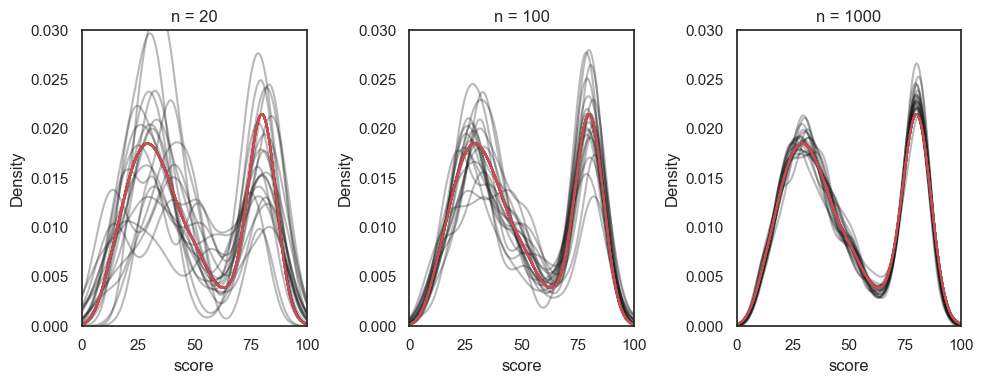

In [8]:
# You wouldn't be expected to produce this code yourself!
samplesize=[20,100,1000]
plt.figure(figsize=[10,4])

for j in range(len(samplesize)):
    plt.subplot(1,3,j+1)
    for i in range(20):
        sample = UKBrexdex.sample(n=samplesize[j],replace=False)
        sns.kdeplot(sample.score, color='k', alpha=0.3, bw_adjust=0.5) # note I manually changed the smoothing of the KDE plot - this is a bit tangential to the point of the exercise though so don't get distracted by it
        plt.xlim([0,100])
        plt.ylim([0, 0.03])
        sns.kdeplot(UKBrexdex['score'],color='r')   
        plt.title('n = ' + str(samplesize[j]))

plt.tight_layout()
plt.show()